# Section 1: EDA

In [1]:
#importting necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.linear_model import LinearRegression
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv("data/winequality-red.csv",sep = ';')
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


AxesSubplot(0.125,0.125;0.775x0.755)


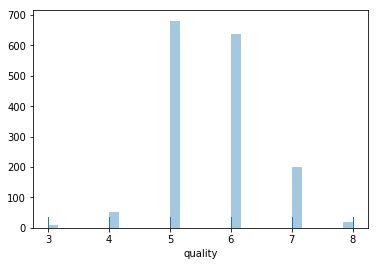

In [5]:
print(sns.distplot(data['quality'], kde = False, rug = True))

In [6]:
np.round(data.describe())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0
mean,8.0,1.0,0.0,3.0,0.0,16.0,46.0,1.0,3.0,1.0,10.0,6.0
std,2.0,0.0,0.0,1.0,0.0,10.0,33.0,0.0,0.0,0.0,1.0,1.0
min,5.0,0.0,0.0,1.0,0.0,1.0,6.0,1.0,3.0,0.0,8.0,3.0
25%,7.0,0.0,0.0,2.0,0.0,7.0,22.0,1.0,3.0,1.0,10.0,5.0
50%,8.0,1.0,0.0,2.0,0.0,14.0,38.0,1.0,3.0,1.0,10.0,6.0
75%,9.0,1.0,0.0,3.0,0.0,21.0,62.0,1.0,3.0,1.0,11.0,6.0
max,16.0,2.0,1.0,16.0,1.0,72.0,289.0,1.0,4.0,2.0,15.0,8.0


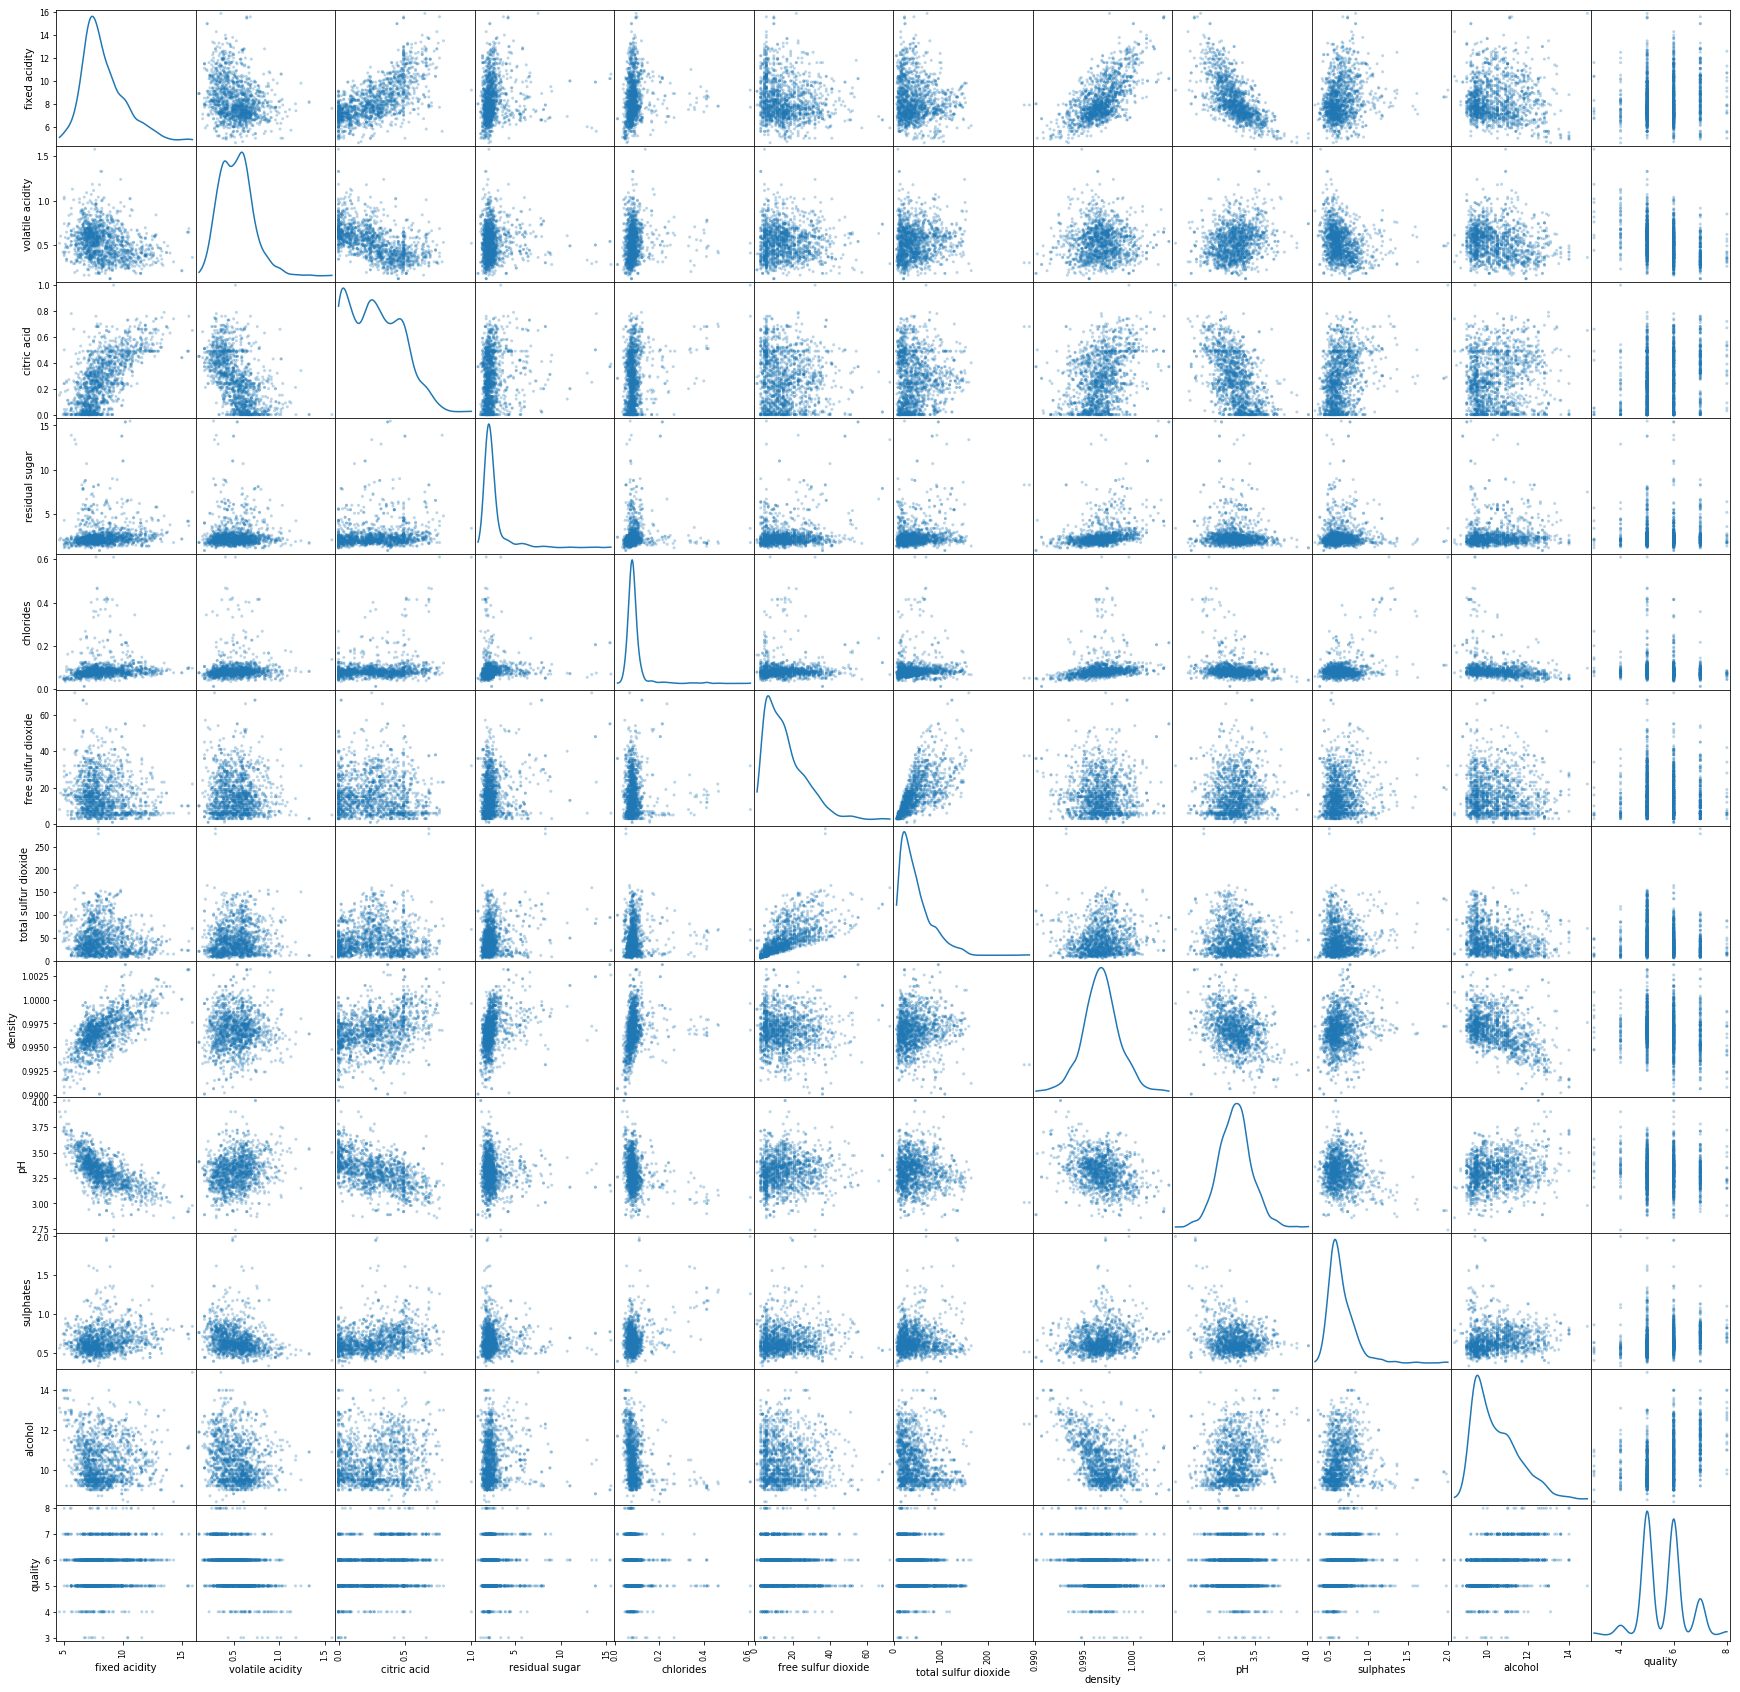

In [20]:
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (30,30), diagonal = 'kde');

# Section 2: Finding Correlations and training a model

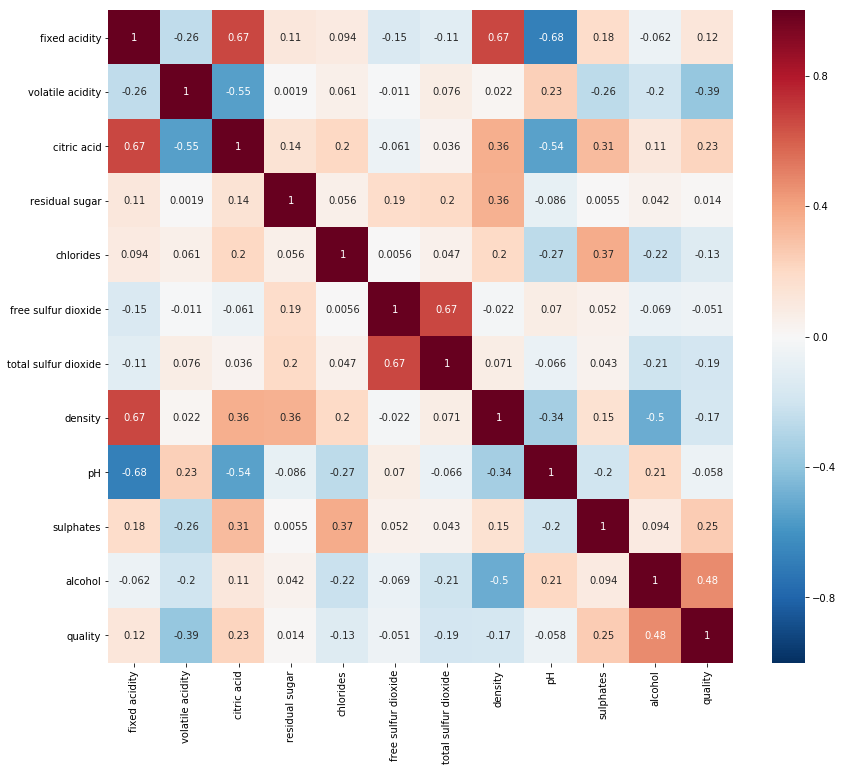

In [21]:
correlation = data.corr()
plt.figure(figsize=(14,12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In [22]:
correlations = data.corr()['quality'].drop('quality')
print(correlations)

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64


In [23]:
def get_features(correlation_threshold):
    abs_corrs = correlation.abs()
    high_correlation = abs_corrs[abs_corrs > correlation_threshold].index.values.tolist()
    return high_correlation

In [24]:
#Getting features with correlation > 0.05
features = get_features(0.05)
print(features)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [25]:
#Spliting the data into test and train sets
features.remove('quality')
x = data[features]
y = data['quality']
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 69)

In [26]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print(regressor.coef_)

[ 1.53026097e-02 -1.03496430e+00 -2.06678483e-01  1.07684720e-02
 -1.76314461e+00  4.72605214e-03 -3.41842151e-03 -1.52615837e+01
 -4.62571092e-01  9.51363926e-01  2.71399570e-01]


In [27]:
train_pred = regressor.predict(x_train)
test_pred = regressor.predict(x_test)

In [28]:
#Calculating RMSE
train_rmse = mean_squared_error(train_pred, y_train) ** 0.5
print('Train set RMSE score: ',train_rmse)
test_rmse = mean_squared_error(test_pred, y_test) ** 0.5
print('Test set RMSE score: ',test_rmse)

Train set RMSE score:  0.6351648212218675
Test set RMSE score:  0.6777024596722196


In [29]:
predicted_data = np.round_(test_pred)
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,test_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test,test_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test,test_pred)))
coefficients = pd.DataFrame(regressor.coef_,features)
coefficients.columns = ['Coefficient']
print(coefficients)

Mean Absolute Error:  0.5250318474795388
Mean Squared Error:  0.45928062384577656
Root Mean Squared Error:  0.6777024596722196
                      Coefficient
fixed acidity            0.015303
volatile acidity        -1.034964
citric acid             -0.206678
residual sugar           0.010768
chlorides               -1.763145
free sulfur dioxide      0.004726
total sulfur dioxide    -0.003418
density                -15.261584
pH                      -0.462571
sulphates                0.951364
alcohol                  0.271400
